## Explore Particles

- Perform EDA on _particles_ Data.

In [1]:
import sys, os, glob, yaml

In [2]:
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import trackml.dataset
import seaborn as sns

In [4]:
sys.path.append('src')

### _Dataset_

In [5]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
# input_dir = './data_sets/pandaml/data_0.1_1.5_GeV/'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [6]:
input_dir = './data'

In [7]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

In [8]:
file_prefixes[:10]

['./data/event0000000000',
 './data/event0000000001',
 './data/event0000000002',
 './data/event0000000003',
 './data/event0000000004',
 './data/event0000000005',
 './data/event0000000006',
 './data/event0000000007',
 './data/event0000000008',
 './data/event0000000009']

In [9]:
event_id = 0
event_prefix = file_prefixes[event_id]

In [10]:
# load an event in default order
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

## Particles

The particles files contains the following values for each particle/entry:  
* __particle_id__: numerical identifier of the particle inside the event.
* __vx, vy, vz__: initial position or vertex (in millimeters) in global coordinates.
* __px, py, pz__: initial momentum (in GeV/c) along each global axis.
* __q__: particle charge (as multiple of the absolute electron charge).
* __nhits__: number of hits generated by this particle.

The particle data help us understand each particle's initial __position__, __momentum__, and __charge__, which we can join with the event truth dataset to get the particle's final position and momentum. This is needed to identify the tracks that each particle generated.

In [11]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary
0,7,-0.876238,-0.518643,2.78956,-0.069382,-0.080921,0.02145,-1,1,-211,0.203417,1
1,7,-0.876238,-0.518643,2.78956,-0.069382,-0.080921,0.02145,-1,1,-211,0.203417,1
2,7,-0.876238,-0.518643,2.78956,-0.069382,-0.080921,0.02145,-1,1,-211,0.203417,1
3,7,-0.876238,-0.518643,2.78956,-0.069382,-0.080921,0.02145,-1,1,-211,0.203417,1
4,7,-0.876238,-0.518643,2.78956,-0.069382,-0.080921,0.02145,-1,1,-211,0.203417,1


### _Unique Particles and Their Frequencies_

In [12]:
# lets get unique pids with freq (~ hits).
# np.unique(particles.particle_id.values)
pids, pids_fr = np.unique(particles.particle_id, return_counts=True)

In [13]:
pids

array([ 4,  6,  7, 93])

In [14]:
pids_fr

array([  7,   9,  29, 161])

### _Drop Duplicates and Reset_

- First, count duplicate `particle_id` and add the count to column `nhits`
- Second, drop duplicate rows and reset the index of rows i.e. `0,1,2,...,n-1`

In [15]:
particles.describe()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.0,206.000000,206.000000,206.000000
mean,74.067961,30.997908,14.868641,157.297577,0.004151,-0.037792,0.029880,-0.912621,1.0,-16.825243,7.741594,0.218447
std,35.900747,16.629435,8.000443,80.983192,0.054448,0.024734,0.221123,0.409802,0.0,622.894023,3.956158,0.414199
min,4.000000,-0.876238,-0.518643,2.789560,-0.114157,-0.080921,-0.040806,-1.000000,1.0,-2212.000000,0.203417,0.000000
25%,93.000000,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1.000000,1.0,-11.000000,9.827610,0.000000
50%,93.000000,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1.000000,1.0,-11.000000,9.827610,0.000000
75%,93.000000,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1.000000,1.0,-11.000000,9.827610,0.000000
max,93.000000,39.763199,19.084400,199.996002,0.213334,0.061650,1.005330,1.000000,1.0,2212.000000,9.827610,1.000000


In [16]:
particles['nhits'] = particles.groupby(['particle_id'])['nhits'].transform('count')

In [17]:
particles.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary
0,7,-0.876238,-0.518643,2.789560,-0.069382,-0.080921,0.021450,-1,29,-211,0.203417,1
1,6,-0.876238,-0.518643,2.789560,-0.114157,-0.027715,0.562859,1,9,2212,0.203417,1
2,4,2.427600,1.436890,13.989700,0.213334,0.061650,1.005330,-1,7,-2212,0.684764,1
3,93,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1,161,-11,9.827610,0


In [19]:
particles.describe()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.0000,4.000000,4.000000,4.00
mean,27.500000,10.109581,4.871001,54.891205,0.011178,-0.020474,0.387208,-0.5,51.5000,-55.500000,2.729802,0.75
std,43.684475,19.830332,9.520335,96.880508,0.145005,0.059607,0.493256,1.0,73.6727,1809.070572,4.737309,0.50
min,4.000000,-0.876238,-0.518643,2.789560,-0.114157,-0.080921,-0.040806,-1.0,7.0000,-2212.000000,0.203417,0.00
25%,5.500000,-0.876238,-0.518643,2.789560,-0.080575,-0.046413,0.005886,-1.0,8.5000,-711.250000,0.203417,0.75
50%,6.500000,0.775681,0.459123,8.389630,-0.027233,-0.031312,0.292154,-1.0,19.0000,-111.000000,0.444090,1.00
75%,28.500000,11.761499,5.848768,60.491276,0.064520,-0.005374,0.673477,-0.5,62.0000,544.750000,2.970476,1.00
max,93.000000,39.763199,19.084400,199.996002,0.213334,0.061650,1.005330,1.0,161.0000,2212.000000,9.827610,1.00


### Some Properties

In [20]:
particles.head(10)

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary
0,7,-0.876238,-0.518643,2.789560,-0.069382,-0.080921,0.021450,-1,29,-211,0.203417,1
1,6,-0.876238,-0.518643,2.789560,-0.114157,-0.027715,0.562859,1,9,2212,0.203417,1
2,4,2.427600,1.436890,13.989700,0.213334,0.061650,1.005330,-1,7,-2212,0.684764,1
3,93,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1,161,-11,9.827610,0


In [21]:
# maximum hits a particle have
particles[particles.particle_id == 7].nhits

0    29
Name: nhits, dtype: int64

In [22]:
# (1) assign a new quantity
particles.assign(pt=np.sqrt(particles.px**2 + particles.py**2)).head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary,pt
0,7,-0.876238,-0.518643,2.789560,-0.069382,-0.080921,0.021450,-1,29,-211,0.203417,1,0.106593
1,6,-0.876238,-0.518643,2.789560,-0.114157,-0.027715,0.562859,1,9,2212,0.203417,1,0.117473
2,4,2.427600,1.436890,13.989700,0.213334,0.061650,1.005330,-1,7,-2212,0.684764,1,0.222063
3,93,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1,161,-11,9.827610,0,0.037963


In [23]:
# (2) assign a new quantity
particles.assign(pt=particles.apply(lambda row: np.sqrt(row.px**2 + row.py**2), axis=1)).head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary,pt
0,7,-0.876238,-0.518643,2.789560,-0.069382,-0.080921,0.021450,-1,29,-211,0.203417,1,0.106593
1,6,-0.876238,-0.518643,2.789560,-0.114157,-0.027715,0.562859,1,9,2212,0.203417,1,0.117473
2,4,2.427600,1.436890,13.989700,0.213334,0.061650,1.005330,-1,7,-2212,0.684764,1,0.222063
3,93,39.763199,19.084400,199.996002,0.014915,-0.034910,-0.040806,-1,161,-11,9.827610,0,0.037963


### (1) Hit Rate and Charge Distribution
Let's see the distribution of the number of hits per particle, shown below.  A significant number of particles had no attributed hits, and most of them have positive charge in this event.

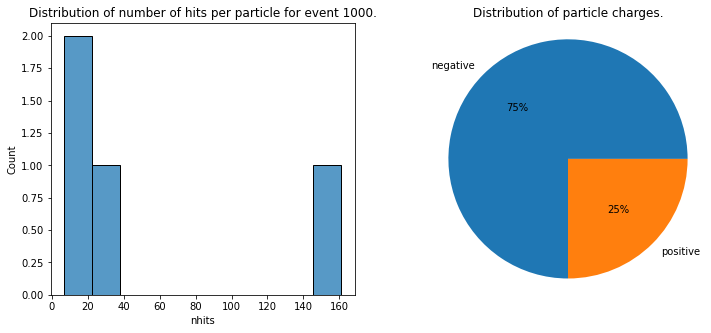

In [24]:
# using the seaborn with pyplot API for subplots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
_ = sns.histplot(data=particles, x='nhits', bins=10) # bins=particles.nhits.max()
plt.title('Distribution of number of hits per particle for event 1000.')

plt.subplot(1, 2, 2)
plt.pie(particles.groupby('q')['vx'].count(),
        labels=['negative', 'positive'],
        autopct='%.0f%%',
        radius=1.1)
plt.title('Distribution of particle charges.')
plt.show()

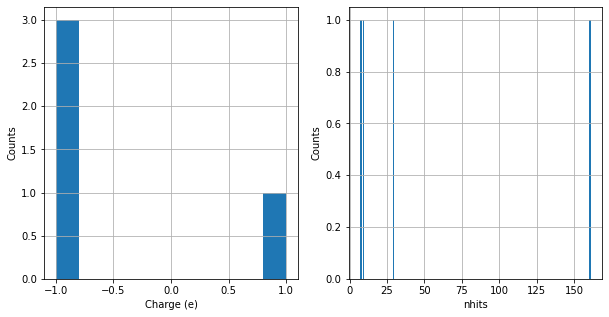

In [25]:
# using the pyplot API for subplots
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
particles.q.hist(bins=10)
plt.xlabel('Charge (e)')
plt.ylabel('Counts')

plt.subplot(1,2,2)
particles.nhits.hist(bins=particles.nhits.max())
plt.xlabel('nhits')
plt.ylabel('Counts')

plt.show()

### (2) Initial Position and Momentum
Let's now take a look at the initial position of the particles around the global coordinates' origin $(x, y)=(0,0)$, as shown in the figure below.

The initial position distribution is more concentrated around the origin (less variance) than its hit position (shown above under the Hits Data section).  As the particles hit the detection surface, they tend to scatter as shown in the particle trajectory plot at the end of this notebook.

The colors here show the number of hits for each particle.

In [26]:
# unique nhits ???
particles.nhits.unique()

array([ 29,   9,   7, 161])

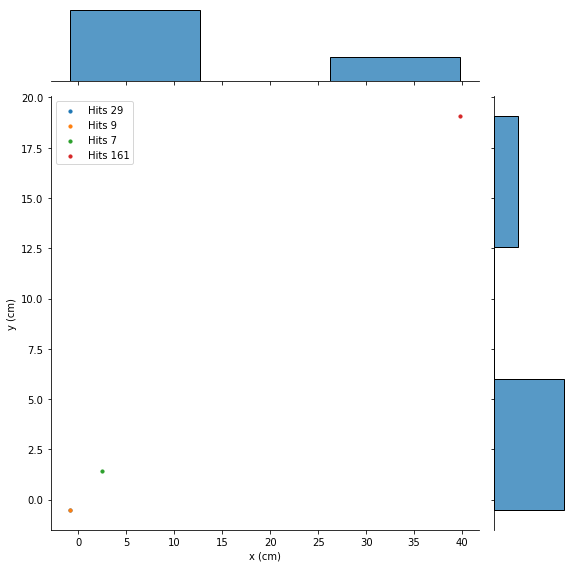

In [27]:
# One needs nhits per particle/track which current set as 1 as placeholder.
# The 'nhits' field is under construction...

g = sns.jointplot(data=particles, x='vx', y='vy',  s=3, height=8)
g.ax_joint.cla()
plt.sca(g.ax_joint)

n_hits = particles.nhits.unique()
for n_hit in n_hits:
    p = particles[particles.nhits == n_hit]
    plt.scatter(p.vx, p.vy, s=10, label='Hits {}'.format(n_hit))

plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.legend()
plt.show()

And here is the initial position of the particles in a $z$, $y$ view.  Colors show number of hits.

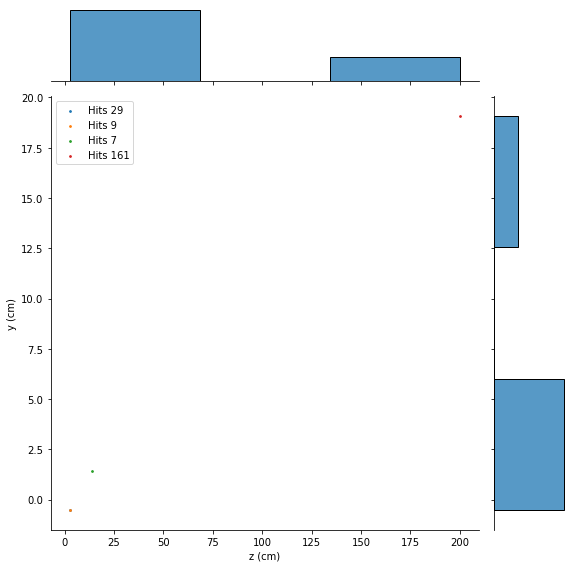

In [28]:
g = sns.jointplot(data=particles, x='vz', y='vy', s=3, height=8)
g.ax_joint.cla()
plt.sca(g.ax_joint)

n_hits = particles.nhits.unique()
for n_hit in n_hits:
    p = particles[particles.nhits == n_hit]
    plt.scatter(p.vz, p.vy, s=3, label='Hits {}'.format(n_hit))

plt.xlabel('z (cm)')
plt.ylabel('y (cm)')
plt.legend()
plt.show()

And this is what they look like in 3D.

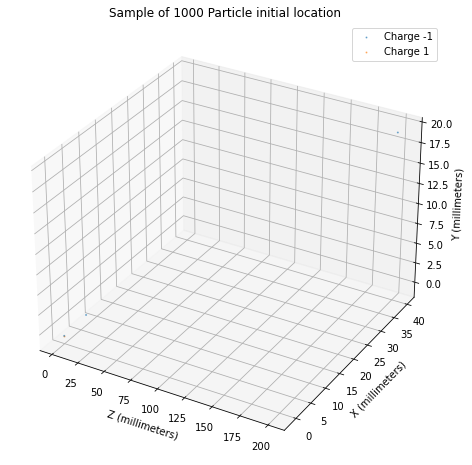

In [29]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
for charge in [-1, 1]:
    q = particles[particles.q == charge]
    ax.scatter(q.vz, q.vx, q.vy, s=1, label='Charge {}'.format(charge), alpha=0.5)

ax.set_title('Sample of 1000 Particle initial location')
ax.set_xlabel('Z (millimeters)')
ax.set_ylabel('X (millimeters)')
ax.set_zlabel('Y (millimeters)')
ax.legend()
plt.show()

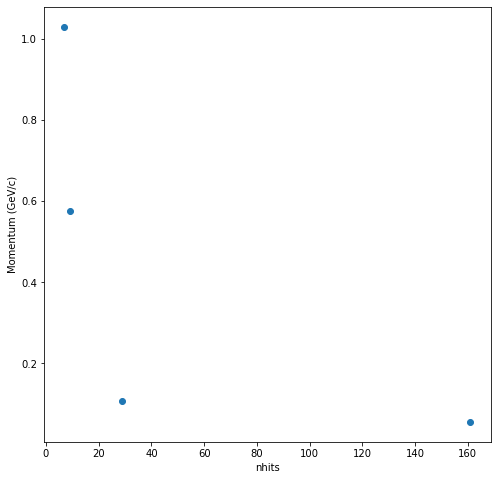

In [30]:
# let's look into the total momentum of particles w.r.t nhits
plt.figure(figsize=(8,8))
p = np.sqrt(particles.px**2 + particles.py**2 + particles.pz**2)
plt.scatter(particles.nhits, p)
#plt.yscale('log')
plt.xlabel('nhits')
plt.ylabel('Momentum (GeV/c)')
plt.show()

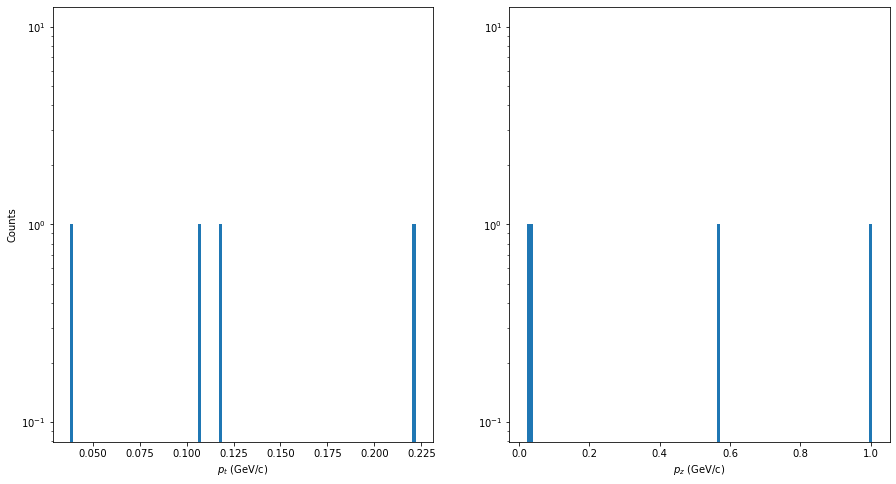

In [31]:
# more on momentum of particles
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
#plt.xscale('log')
plt.hist(np.sqrt(particles.px**2 + particles.py**2), bins=100, log=True)
plt.xlabel(r'$p_t$ (GeV/c)')
plt.ylabel('Counts')
plt.subplot(1,2,2)
#plt.xscale('log')
plt.hist(particles.pz.abs(), bins=100, log=True)
plt.xlabel(r'$p_z$ (GeV/c)')
plt.show()

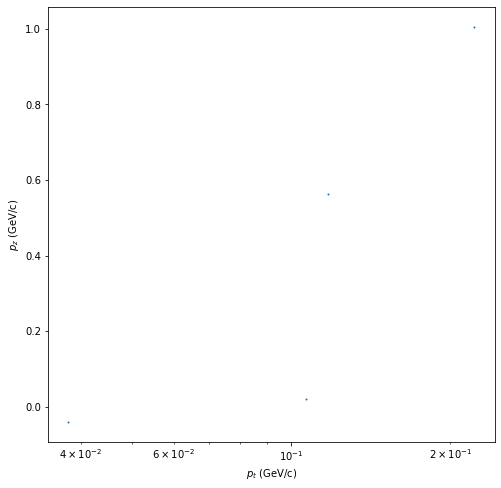

In [32]:
# What about p_t vs p_z?
plt.figure(figsize=(8,8))
plt.scatter(np.sqrt(particles.px**2 + particles.py**2), particles.pz, s=1)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$p_t$ (GeV/c)')
plt.ylabel(r'$p_z$ (GeV/c)')
#plt.zlabel('Counts')
plt.show()

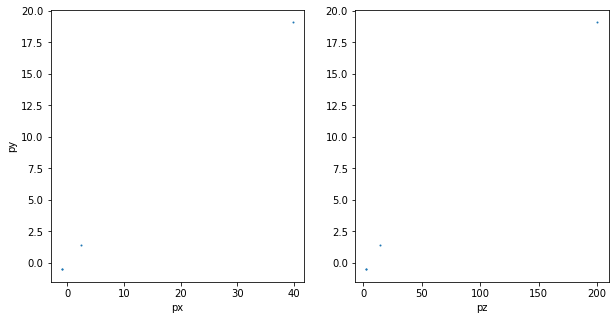

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(particles.vx, particles.vy, s=1)
plt.xlabel('px')
plt.ylabel('py')
plt.subplot(1,2,2)
plt.scatter(particles.vz, particles.vy, s=1)
plt.xlabel('pz')
plt.show()

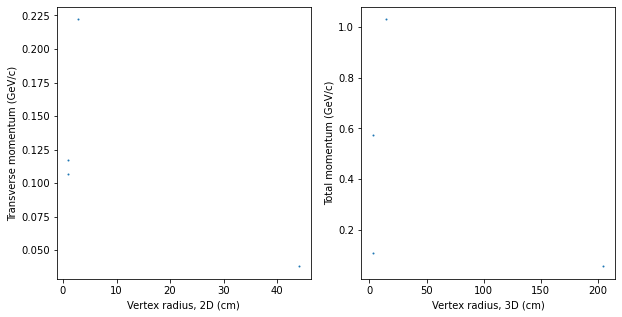

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(np.sqrt(particles.vx**2+particles.vy**2), np.sqrt(particles.px**2+particles.py**2), s=1)
plt.xlabel('Vertex radius, 2D (cm)')
plt.ylabel('Transverse momentum (GeV/c)')
#plt.xscale('log')
#plt.yscale('log')
plt.subplot(1,2,2)
plt.scatter(np.sqrt(particles.vx**2+particles.vy**2+particles.vz**2), np.sqrt(particles.px**2+particles.py**2+particles.pz**2), s=1)
plt.xlabel('Vertex radius, 3D (cm)')
plt.ylabel('Total momentum (GeV/c)')
#plt.xscale('log')
#plt.yscale('log')
plt.show()

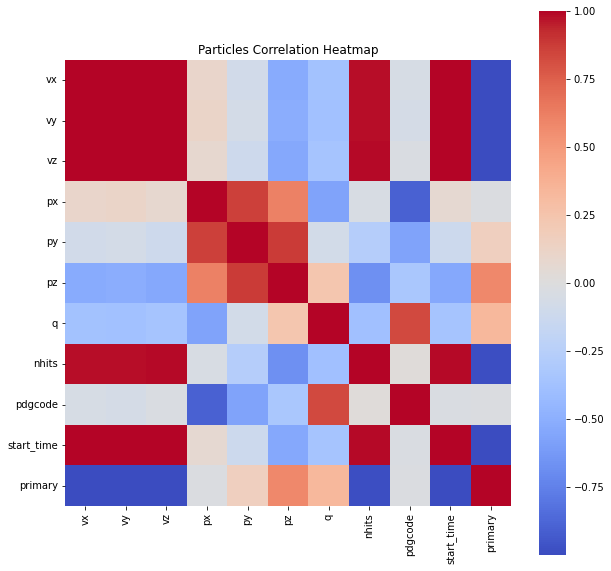

In [35]:
plt.figure(figsize=(10, 10))
particlescorr = particles.drop('particle_id', axis=1).corr()
sns.heatmap(particlescorr, cmap='coolwarm', square=True)
plt.title('Particles Correlation Heatmap')
plt.show()

### (3) Particle Trajectory
We can reconstruct the trajectories for a few particles given their intersection points with the detection layers.  As explained in the [competition evaluation page][ceval], hits from straight tracks have larger wieghts, and random tracks or hits with very short tracks have weights of zero.  The figure below shows two such examples.

Thanks to [maka's notebook][traj] for the idea.

[traj]: https://www.kaggle.com/makahana/quick-trajectory-plot
[ceval]: https://www.kaggle.com/c/trackml-particle-identification#evaluation

/tmp/ipykernel_48419/670011971.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_traj = (p_traj_surface
/tmp/ipykernel_48419/670011971.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  p_traj2 = (p_traj_surface2


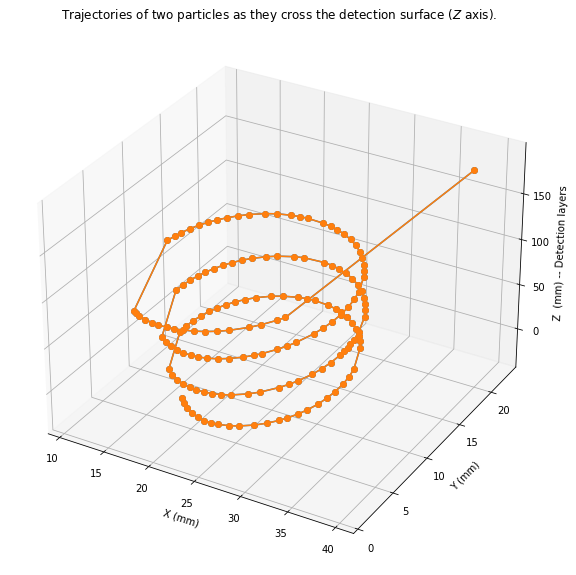

In [36]:
# Get particle id with max number of hits in this event
particle = particles.loc[particles.nhits == particles.nhits.max()].iloc[0]
particle2 = particles.loc[particles.nhits == particles.nhits.max()].iloc[0]

# Get points where the same particle intersected subsequent layers of the observation material
p_traj_surface = truth[truth.particle_id == particle.particle_id][['tx', 'ty', 'tz']]
p_traj_surface2 = truth[truth.particle_id == particle2.particle_id][['tx', 'ty', 'tz']]

p_traj = (p_traj_surface
          .append({'tx': particle.vx, 'ty': particle.vy, 'tz': particle.vz}, ignore_index=True)
          .sort_values(by='tz'))

p_traj2 = (p_traj_surface2
          .append({'tx': particle2.vx, 'ty': particle2.vy, 'tz': particle2.vz}, ignore_index=True)
          .sort_values(by='tz'))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot(
    xs=p_traj.tx,
    ys=p_traj.ty,
    zs=p_traj.tz, marker='o')

ax.plot(
    xs=p_traj2.tx,
    ys=p_traj2.ty,
    zs=p_traj2.tz, marker='o')

ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z  (mm) -- Detection layers')
plt.title('Trajectories of two particles as they cross the detection surface ($Z$ axis).')
plt.show()